### CLASS torch.nn.Module(*args, **kwargs)
Base class for all neural network modules.

Your models should also subclass this class.

# Workflow

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the dataset
wine = load_wine()

# Features and target
X = wine.data       # numpy array of features
y = wine.target

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [ ]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

 # Implementing classification a simple one
class MYANN(nn.Module):

  def __init__(self):
    super().__init__() # intializing base class
    # defening custom weights and bias
    self.weight1=nn.Parameter(data=torch.randn((8,13),dtype=torch.float32),requires_grad=True)
    self.bias1=nn.Parameter(data=torch.zeros(8,),requires_grad=True)

    # 2nd layer
    self.weight2=nn.Parameter(data=torch.randn((5,8),dtype=torch.float32),requires_grad=True)
    self.bias2=nn.Parameter(data=torch.zeros(5,),requires_grad=True)

    # 3rd layer
    self.weight3=nn.Parameter(data=torch.randn((3,5),dtype=torch.float32),requires_grad=True)
    self.bias3=nn.Parameter(data=torch.zeros(3,),requires_grad=True)


  # forward  function  necessary to define in subclass
  def forward(self,train_data):
    # calculating forward
    layer_1=torch.matmul(train_data,self.weight1.T)+self.bias1
    layer_1=F.sigmoid(layer_1)

    # 2nd layer output

    layer_2=torch.matmul(layer_1,self.weight2.T)+self.bias2
    layer_2=F.sigmoid(layer_2)

    # 3rd layer output linear
    output=torch.matmul(layer_2,self.weight3.T)+self.bias3
    output=F.softmax(output,dim=1)

    return output


model=MYANN()







In [ ]:
# attributes of model
list(model.parameters())

[Parameter containing:
 tensor([[-0.2306,  0.6482,  0.6098, -1.8956, -2.0441,  0.6342, -2.1208, -0.8640,
          -0.9885, -0.0964, -0.7696, -0.1871,  0.3705],
         [-0.4594, -1.5796, -0.9283,  0.0583,  0.8094,  0.2979,  2.4570,  1.7775,
          -0.7527,  1.5202, -0.9921,  0.9501,  0.5130],
         [-0.1935, -0.9186,  1.5782,  1.0378, -0.5450,  1.4324, -2.0079, -1.1184,
          -0.3378,  2.2299, -1.0699,  0.7192, -0.7800],
         [-2.6911,  1.0326,  1.2983,  0.5493,  0.7823, -0.2404, -0.7821, -0.4796,
          -0.4999, -1.4599,  1.8395, -0.5460, -1.6320],
         [ 0.0259,  0.3548, -0.1135,  0.7795,  1.0793, -0.1314, -1.1710, -0.5511,
           0.8154, -1.4413, -0.2812,  2.4468,  1.1155],
         [-1.9130,  0.9741,  0.3139,  1.0962, -1.1669,  1.2897, -0.7226, -0.4642,
          -0.5981, -0.0046,  1.3398, -0.1412,  0.3246],
         [-0.5362, -0.3420, -0.7462,  1.0827,  1.0895,  0.5078, -0.2139, -1.6768,
           0.6030,  1.6076,  1.0780, -1.0575, -0.1583],
         [-

In [ ]:
model.state_dict()

OrderedDict([('weight1',
              tensor([[-0.2306,  0.6482,  0.6098, -1.8956, -2.0441,  0.6342, -2.1208, -0.8640,
                       -0.9885, -0.0964, -0.7696, -0.1871,  0.3705],
                      [-0.4594, -1.5796, -0.9283,  0.0583,  0.8094,  0.2979,  2.4570,  1.7775,
                       -0.7527,  1.5202, -0.9921,  0.9501,  0.5130],
                      [-0.1935, -0.9186,  1.5782,  1.0378, -0.5450,  1.4324, -2.0079, -1.1184,
                       -0.3378,  2.2299, -1.0699,  0.7192, -0.7800],
                      [-2.6911,  1.0326,  1.2983,  0.5493,  0.7823, -0.2404, -0.7821, -0.4796,
                       -0.4999, -1.4599,  1.8395, -0.5460, -1.6320],
                      [ 0.0259,  0.3548, -0.1135,  0.7795,  1.0793, -0.1314, -1.1710, -0.5511,
                        0.8154, -1.4413, -0.2812,  2.4468,  1.1155],
                      [-1.9130,  0.9741,  0.3139,  1.0962, -1.1669,  1.2897, -0.7226, -0.4642,
                       -0.5981, -0.0046,  1.3398, -0.1412,  

In [ ]:
# prediction without training
# context manager
x_test_tensor=torch.tensor(x_test,dtype=torch.float32)
with torch.inference_mode():
    y_preds = model(x_test_tensor)


print(y_preds)

# Initial and forward works properly



tensor([[0.0112, 0.1923, 0.7965],
        [0.0056, 0.1575, 0.8369],
        [0.0136, 0.1242, 0.8622],
        [0.0056, 0.1575, 0.8369],
        [0.0136, 0.1242, 0.8622],
        [0.0056, 0.1575, 0.8369],
        [0.0136, 0.1242, 0.8622],
        [0.0112, 0.1924, 0.7964],
        [0.0112, 0.1924, 0.7964],
        [0.0056, 0.1575, 0.8369],
        [0.0056, 0.1575, 0.8369],
        [0.0238, 0.1529, 0.8232],
        [0.0056, 0.1575, 0.8369],
        [0.0238, 0.1529, 0.8232],
        [0.0056, 0.1575, 0.8369],
        [0.0239, 0.1531, 0.8230],
        [0.0238, 0.1529, 0.8232],
        [0.0112, 0.1923, 0.7965],
        [0.0056, 0.1575, 0.8369],
        [0.0238, 0.1529, 0.8232],
        [0.0056, 0.1575, 0.8369],
        [0.0136, 0.1242, 0.8622],
        [0.0112, 0.1924, 0.7964],
        [0.0232, 0.1510, 0.8258],
        [0.0238, 0.1529, 0.8232],
        [0.0132, 0.1436, 0.8433],
        [0.0363, 0.2847, 0.6790],
        [0.0112, 0.1924, 0.7964],
        [0.0136, 0.1242, 0.8622],
        [0.005

In [ ]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [ ]:
# define loss function
#loss=F.cross_entropy(input=y_preds,target=torch.tensor(y_test))

#print(loss)


# individually loss
loss=F.cross_entropy(input=y_preds,target=torch.tensor(y_test),reduction="none")

print(loss)



tensor([1.4797, 1.4953, 0.6451, 1.4953, 1.3830, 1.4953, 1.3830, 0.6945, 1.2985,
        0.6639, 1.4953, 0.6735, 1.4953, 1.3438, 1.4953, 1.3436, 1.3438, 1.2986,
        1.4953, 1.3438, 1.4953, 1.3830, 1.2985, 0.6717, 0.6735, 0.6589, 1.1828,
        1.2985, 1.3830, 1.4953, 1.4953, 1.3438, 0.6716, 1.4953, 1.4953, 1.4953,
        0.6451, 0.6735, 1.2985, 0.6709, 1.4953, 1.1832, 1.3438, 1.2985, 0.6451,
        1.4953, 1.2985, 1.3438, 0.6451, 1.4953, 1.3438, 1.4952, 1.4953, 0.6945])


In [ ]:
 # training
import torch.optim as optimizer
epochs=100
learning_rate=0.01
# when you are not sure your data is already tensor then creating newone by torch.tensor is having issue with memory,gradient
x_train=x_train.clone().detach().float()
y_train=y_train.clone().detach().long()

# defining optimizer
optim=optimizer.Adam(model.parameters(),lr=learning_rate)

for i in range(epochs):
  # forward prop
  output=model(x_train)
  # loss
  loss=F.cross_entropy(input=output,target=y_train,reduction='mean')

  # gradients accumlate over time necessary to remove before next updation
  model.zero_grad()

  # calculate grad
  loss.backward()

  # update
  optim.step()

  # Print loss every 10 epochs
  if i % 10 == 0:
      print(f"Epoch {i}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.9131
Epoch 10, Loss: 0.8968
Epoch 20, Loss: 0.8809
Epoch 30, Loss: 0.8657
Epoch 40, Loss: 0.8522
Epoch 50, Loss: 0.8422
Epoch 60, Loss: 0.8353
Epoch 70, Loss: 0.8303
Epoch 80, Loss: 0.8268
Epoch 90, Loss: 0.8241


In [ ]:
list(model.named_parameters()) # accesing final weights with names

[('weight1',
  Parameter containing:
  tensor([[-0.3413,  0.5234,  0.5343, -2.1159, -2.0981,  0.6282, -2.0274, -1.0228,
           -1.0460, -0.0639, -0.9195, -0.2751,  0.3155],
          [-0.4594, -1.5796, -0.9283,  0.0583,  0.8094,  0.2979,  2.4570,  1.7775,
           -0.7527,  1.5202, -0.9921,  0.9501,  0.5130],
          [-0.1935, -0.9186,  1.5782,  1.0378, -0.5450,  1.4324, -2.0079, -1.1184,
           -0.3378,  2.2299, -1.0699,  0.7192, -0.7800],
          [-2.6911,  1.0326,  1.2983,  0.5493,  0.7823, -0.2404, -0.7821, -0.4796,
           -0.4999, -1.4599,  1.8395, -0.5460, -1.6320],
          [ 0.0259,  0.3548, -0.1135,  0.7795,  1.0793, -0.1314, -1.1710, -0.5511,
            0.8154, -1.4413, -0.2812,  2.4468,  1.1155],
          [-2.0301,  0.7042,  0.2611,  1.0583, -1.2013,  1.1406, -1.0934, -0.9091,
           -0.6951,  0.3326,  0.9622, -0.6523,  0.3352],
          [-0.3893, -0.2252, -0.6044,  1.2161,  1.2320,  0.6496, -0.0578, -1.5328,
            0.7530,  1.7614,  1.2242, -0

In [ ]:
list(model.parameters()) # having no name

[Parameter containing:
 tensor([[-0.3413,  0.5234,  0.5343, -2.1159, -2.0981,  0.6282, -2.0274, -1.0228,
          -1.0460, -0.0639, -0.9195, -0.2751,  0.3155],
         [-0.4594, -1.5796, -0.9283,  0.0583,  0.8094,  0.2979,  2.4570,  1.7775,
          -0.7527,  1.5202, -0.9921,  0.9501,  0.5130],
         [-0.1935, -0.9186,  1.5782,  1.0378, -0.5450,  1.4324, -2.0079, -1.1184,
          -0.3378,  2.2299, -1.0699,  0.7192, -0.7800],
         [-2.6911,  1.0326,  1.2983,  0.5493,  0.7823, -0.2404, -0.7821, -0.4796,
          -0.4999, -1.4599,  1.8395, -0.5460, -1.6320],
         [ 0.0259,  0.3548, -0.1135,  0.7795,  1.0793, -0.1314, -1.1710, -0.5511,
           0.8154, -1.4413, -0.2812,  2.4468,  1.1155],
         [-2.0301,  0.7042,  0.2611,  1.0583, -1.2013,  1.1406, -1.0934, -0.9091,
          -0.6951,  0.3326,  0.9622, -0.6523,  0.3352],
         [-0.3893, -0.2252, -0.6044,  1.2161,  1.2320,  0.6496, -0.0578, -1.5328,
           0.7530,  1.7614,  1.2242, -0.9113, -0.0062],
         [-

In [ ]:
for name, param in model.named_parameters():
    print(name, param.shape)


weight1 torch.Size([8, 13])
bias1 torch.Size([8])
weight2 torch.Size([5, 8])
bias2 torch.Size([5])
weight3 torch.Size([3, 5])
bias3 torch.Size([3])


When you train the model (loss.backward(), optimizer.step()), all updates are applied in-place to the parameters inside the model

In [ ]:
# predection
model.eval() # for explicitly mentoning predection time so to get running mean,var of batchnorm, open your dropout nueorns etc___
x_test=torch.tensor(x_test,dtype=torch.float32)
with torch.inference_mode():
  y_preds=model(x_test)
  _,prediction=torch.max(y_preds,dim=1)




In [ ]:
_

tensor([0.6500, 0.9699, 0.6500, 0.9699, 0.6500, 0.9699, 0.6500, 0.6500, 0.6500,
        0.9699, 0.9699, 0.9670, 0.9699, 0.9670, 0.9699, 0.9796, 0.9670, 0.6500,
        0.9699, 0.9670, 0.9699, 0.6500, 0.6500, 0.6500, 0.6498, 0.6500, 0.9927,
        0.6500, 0.6500, 0.9699, 0.9699, 0.9670, 0.5912, 0.9699, 0.9699, 0.9699,
        0.6500, 0.6112, 0.6500, 0.6500, 0.9699, 0.9927, 0.9670, 0.6500, 0.6500,
        0.9699, 0.6500, 0.9678, 0.6500, 0.9699, 0.9670, 0.9699, 0.9699, 0.6500])

In [ ]:
prediction

tensor([2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2,
        2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1,
        2, 0, 1, 0, 0, 2])

Confusion Matrix:
 [[18  0  1]
 [ 0 10 11]
 [ 1  1 12]]


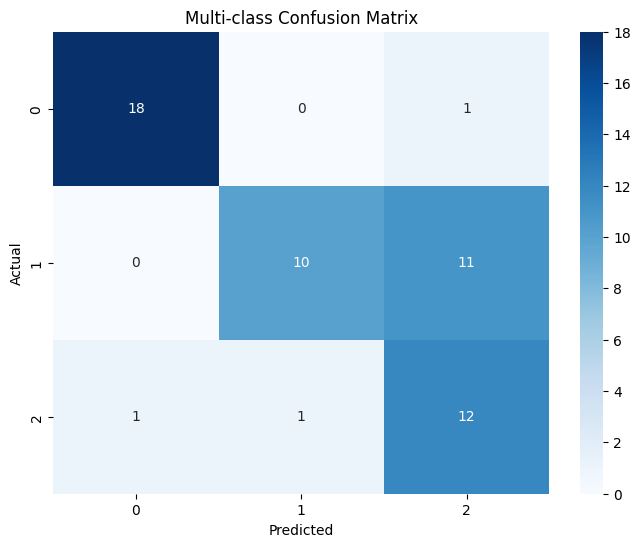

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = y_test.cpu().numpy() if torch.is_tensor(y_test) else y_test
pred_labels = prediction.cpu().numpy()

# Step 4: Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multi-class Confusion Matrix")
plt.show()
